## Table of Contents

* [1. Exploratory Data Analysis](#eda)
    * [1.1. Opening the base dataset](#base)
    * [1.2. Data Evaluation](#evaluation)
        * [1.2.1. Selecting the country: Italy](#country)

* [2. Hypothesis Testing](#hypothesis)
    * [2.1. Looking for candidates for hypothesis feature](#candidates)
    * [2.2. Theory of two-sample problems](#theory)
    * [2.3. Case №1: Spain and Spanish cuisine [reject H0]](#spain)
    * [2.4. Case №2: UK and Cheap Eats [reject H0]](#uk1)
    * [2.5. Case №3: UK and Vegetarian Friendly [reject H0]](#uk2)
    * [2.6. Case №4: Italy and Cheap Eats [failed to reject]](#italy1)


<a id="eda"></a>

# 1. EDA

In [70]:
# import opendatasets as od
# import os
import pandas as pd
import numpy as np
import copy
import itertools


In [320]:
# functions for restaurant dataset

%run ../functions/rating_of_column_values.ipynb
%run ../functions/features_to_flags.ipynb


<a id="base"></a>

## 1.1. Opening the base dataset

In [18]:
base_rest_df = pd.read_csv('../restaurant_base.csv', sep=';')


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/699545002.py:1: DtypeWarning: Columns (14,16,18,19,20,21,22,23,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  base_rest_df = pd.read_csv('../restaurant_base.csv', sep=';')


In [19]:
base_rest_df.shape

(198446, 40)

In [20]:
base_rest_df.head()

,restaurant_link,country,region,province,city,latitude,longitude,price_level,cuisines,features,...,meals_Lunch,meals_Breakfast,meals_Drinks,meals_Brunch,meals_After-hours,special_diets_Vegetarian Friendly,special_diets_Gluten Free Options,special_diets_Vegan Options,special_diets_Halal,special_diets_Kosher
0,g10001637-d10002227,France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,45.961674,1.169131,€,French,"Reservations, Seating, Wheelchair Accessible, ...",...,1,0,0,0,0,0,0,0,0,0
1,g10002858-d4586832,France,Centre-Val de Loire,Berry,Rivarennes,46.635895,1.386133,€,"French, European","Reservations, Seating, Table Service, Wheelcha...",...,1,0,1,0,0,0,0,0,0,0
2,g10002986-d3510044,France,Nouvelle-Aquitaine,Correze,Lacelle,45.642610,1.824460,€,French,"Reservations, Seating, Serves Alcohol, Table S...",...,1,0,0,0,0,0,0,0,0,0
3,g10022428-d9767191,France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,44.208860,2.960470,€€-€€€,French,"Reservations, Seating, Wheelchair Accessible, ...",...,1,0,0,0,0,0,0,0,0,0
4,g10055971-d10040330,France,Auvergne-Rhone-Alpes,Ain,Journans,46.144340,5.331200,€€-€€€,French,"Reservations, Seating, Table Service, Serves A...",...,1,0,0,0,0,0,0,0,0,0


In [21]:
base_rest_df.columns

Index(['restaurant_link', 'country', 'region', 'province', 'city', 'latitude',
       'longitude', 'price_level', 'cuisines', 'features', 'avg_rating',
       'total_reviews_count', 'price_min', 'price_max', 'min_open_dttm',
       'min_open_sec', 'max_close_dttm', 'max_close_sec', 'break_flg',
       'max_break_hours', 'max_no_weekend_hours', 'max_weekend_hours',
       'open_mon_hours', 'open_tue_hours', 'open_wed_hours', 'open_thu_hours',
       'open_fri_hours', 'open_sat_hours', 'open_sun_hours', 'meals_Dinner',
       'meals_Lunch', 'meals_Breakfast', 'meals_Drinks', 'meals_Brunch',
       'meals_After-hours', 'special_diets_Vegetarian Friendly',
       'special_diets_Gluten Free Options', 'special_diets_Vegan Options',
       'special_diets_Halal', 'special_diets_Kosher'],
      dtype='object')

<a id="evaluation"></a>

## 1.2. Data Evaluation

In [29]:
drop_columns = [
#     'restaurant_link', 
#     'country', 
    'region', 'province', 'city', 
    'latitude', 'longitude', 
    
#     'price_level', 'cuisines', 'features', 
#     'avg_rating', 'total_reviews_count', 
    'price_min', 'price_max', 
    
    'min_open_dttm',
       'min_open_sec', 'max_close_dttm', 'max_close_sec', 'break_flg',
       'max_break_hours', 'max_no_weekend_hours', 'max_weekend_hours',
       'open_mon_hours', 'open_tue_hours', 'open_wed_hours', 'open_thu_hours',
       'open_fri_hours', 'open_sat_hours', 'open_sun_hours', 
    
#     'meals_Dinner',
#        'meals_Lunch', 'meals_Breakfast', 'meals_Drinks', 'meals_Brunch',
#        'meals_After-hours', 'special_diets_Vegetarian Friendly',
#        'special_diets_Gluten Free Options', 'special_diets_Vegan Options',
#        'special_diets_Halal', 'special_diets_Kosher'
]

In [37]:
base_rest_df2 = base_rest_df.drop(drop_columns, axis=1)
print(base_rest_df2.shape)

(198446, 18)


In [147]:
base_rest_df2.head()

,restaurant_link,country,price_level,cuisines,features,avg_rating,total_reviews_count,meals_Dinner,meals_Lunch,meals_Breakfast,...,cuisines_Mediterranean,cuisines_Bar,cuisines_Spanish,cuisines_Cafe,cuisines_Pub,cuisines_Seafood,cuisines_Pizza,cuisines_British,cuisines_Fast food,cuisines_Asian
0,g10001637-d10002227,France,€,French,"Reservations, Seating, Wheelchair Accessible, ...",4.0,36.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,g10002858-d4586832,France,€,"French, European","Reservations, Seating, Table Service, Wheelcha...",5.0,13.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,g10002986-d3510044,France,€,French,"Reservations, Seating, Serves Alcohol, Table S...",4.0,34.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,g10022428-d9767191,France,€€-€€€,French,"Reservations, Seating, Wheelchair Accessible, ...",4.5,11.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,g10055971-d10040330,France,€€-€€€,French,"Reservations, Seating, Table Service, Serves A...",4.0,36.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
# base_rest_df2 = base_rest_df2.drop(['features_cnt'], axis=1)

In [230]:
base_rest_df2['cuisines_cnt'] = base_rest_df2['cuisines'].apply(lambda x: 1+x.count(','))
base_rest_df2['meals_cnt'] = len([col for col in base_rest_df2.columns if 'meals_' in col])
base_rest_df2['special_diets_cnt'] = len([col for col in base_rest_df2.columns if 'special_diets_' in col])

base_rest_df2['price_level_Cheap Eats'] = base_rest_df2['price_level'].apply(lambda x: 1 if str(x) == '€' else 0)
base_rest_df2['price_level_cnt'] = 1

base_rest_df2

,restaurant_link,country,price_level,cuisines,features,avg_rating,total_reviews_count,meals_Dinner,meals_Lunch,meals_Breakfast,...,cuisines_Seafood,cuisines_Pizza,cuisines_British,cuisines_Fast food,cuisines_Asian,cuisines_cnt,meals_cnt,special_diets_cnt,price_level_Cheap Eats,price_level_cnt
0,g10001637-d10002227,France,€,French,"Reservations, Seating, Wheelchair Accessible, ...",4.0,36.0,1,1,0,...,0,0,0,0,0,1,7,6,1,1
1,g10002858-d4586832,France,€,"French, European","Reservations, Seating, Table Service, Wheelcha...",5.0,13.0,1,1,0,...,0,0,0,0,0,2,7,6,1,1
2,g10002986-d3510044,France,€,French,"Reservations, Seating, Serves Alcohol, Table S...",4.0,34.0,1,1,0,...,0,0,0,0,0,1,7,6,1,1
3,g10022428-d9767191,France,€€-€€€,French,"Reservations, Seating, Wheelchair Accessible, ...",4.5,11.0,1,1,0,...,0,0,0,0,0,1,7,6,0,1
4,g10055971-d10040330,France,€€-€€€,French,"Reservations, Seating, Table Service, Serves A...",4.0,36.0,1,1,0,...,0,0,0,0,0,1,7,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198441,g946541-d6957229,Romania,€€-€€€,"Seafood, European, Mediterranean, Romanian","Reservations, Outdoor Seating, Seating, Serves...",4.0,55.0,1,1,0,...,1,0,0,0,0,4,7,6,0,1
198442,g946541-d8075038,Romania,€,"International, European, Romanian, Central Eur...","Reservations, Takeout, Television, Full Bar, A...",3.5,28.0,1,1,1,...,0,0,0,0,0,4,7,6,1,1
198443,g946543-d4308046,Romania,€€-€€€,"Pizza, Italian","Delivery, Takeout, Outdoor Seating, Seating, W...",4.0,26.0,1,1,0,...,0,1,0,0,0,2,7,6,0,1
198444,g946544-d8490226,Romania,€€-€€€,"Fast food, European",Seating,3.5,21.0,0,1,0,...,0,0,0,1,0,2,7,6,0,1


In [31]:
base_rest_df2.groupby('country').size().sort_values(ascending=False)

country
France             44523
Italy              38738
United Kingdom     35535
Spain              30631
Germany            10259
Portugal            8318
Belgium             5824
Greece              5073
The Netherlands     3499
Ireland             2198
Czech Republic      2014
Austria             1995
Poland              1857
Croatia             1679
Sweden              1330
Denmark             1264
Romania             1123
Hungary              885
Finland              648
Bulgaria             536
Slovakia             517
dtype: int64

In [485]:
base_rest_df2 = base_rest_df2[base_rest_df2['avg_rating'].notna()]

<a id="country"></a>

### 1.2.1. Selecting the country: Italy

In [45]:
italy_df = base_rest_df2[base_rest_df2['country'] == 'Italy']
italy_df2 = features_to_flags(italy_df, ['cuisines', 'features'], 0.05)

italy_df2.columns

/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/334375949.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/334375949.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)


Index(['restaurant_link', 'country', 'price_level', 'avg_rating',
       'total_reviews_count', 'meals_Dinner', 'meals_Lunch', 'meals_Breakfast',
       'meals_Drinks', 'meals_Brunch', 'meals_After-hours',
       'special_diets_Vegetarian Friendly',
       'special_diets_Gluten Free Options', 'special_diets_Vegan Options',
       'special_diets_Halal', 'special_diets_Kosher', 'cuisines_European',
       'cuisines_Italian', 'cuisines_French', 'cuisines_Mediterranean',
       'cuisines_Bar', 'cuisines_Spanish', 'cuisines_Cafe', 'cuisines_Pub',
       'cuisines_Seafood', 'cuisines_Pizza', 'cuisines_British',
       'cuisines_Fast food', 'cuisines_Asian', 'cuisines_Barbecue',
       'features_Seating', 'features_Reservations', 'features_Table Service',
       'features_Wheelchair Accessible', 'features_Serves Alcohol',
       'features_Takeout', 'features_Outdoor Seating',
       'features_Highchairs Available', 'features_Accepts Credit Cards',
       'features_Full Bar', 'features_Parking

In [92]:
# STRONG CORRELATIONS BETWEEN FEATURES

def top_correlations_between_features(country_df, prefixes, threshold):
    features_list = [col for col in country_df.columns if any([pre in col for pre in prefixes])]

    corr_pairs = [(col, country_df[col[0]].corr(country_df[col[1]]))
         for col in itertools.product(*[features_list, features_list])
             if col[0] < col[1] and np.abs(country_df[col[0]].corr(country_df[col[1]])) > threshold
    ]

    corr_pairs = sorted(corr_pairs, key=lambda x: np.abs(x[1]), reverse=True)

    for p in corr_pairs:
        print("{0:.3f}\t{1}".format(p[1], p[0]))
        
    return corr_pairs    

In [93]:
italy_corr_pairs = top_correlations_between_features(
    italy_df2, 
    ['meals_', 'special_diets_', 'cuisines_', 'features_'], 
    0.4
)

0.832	('special_diets_Gluten Free Options', 'special_diets_Vegetarian Friendly')
0.796	('special_diets_Vegan Options', 'special_diets_Vegetarian Friendly')
0.768	('special_diets_Gluten Free Options', 'special_diets_Vegan Options')
0.584	('cuisines_Bar', 'cuisines_Barbecue')
0.566	('features_Free off-street parking', 'features_Parking Available')
0.560	('features_Seating', 'features_Table Service')
0.559	('features_Free Wifi', 'features_Wine and Beer')
0.541	('cuisines_Cafe', 'meals_Breakfast')
0.505	('cuisines_Bar', 'cuisines_Pub')
0.492	('cuisines_Mediterranean', 'cuisines_Seafood')
0.475	('features_Street Parking', 'features_Wine and Beer')
-0.469	('cuisines_Cafe', 'features_Reservations')
0.462	('features_Free off-street parking', 'features_Wine and Beer')
0.439	('features_Accepts Visa', 'features_Free Wifi')
0.437	('features_Reservations', 'meals_Dinner')
-0.433	('cuisines_Cafe', 'meals_Dinner')
0.425	('features_Accepts Visa', 'features_Wine and Beer')
0.418	('features_Reservations

In [112]:
def correlations_between_1_and_set_features(country_df, feature, prefixes, threshold):
    features_list = [col for col in country_df.columns if any([pre in col for pre in prefixes])]

    country_df_threshold = country_df[country_df['total_reviews_count'] > threshold]

    corr_pairs = [(col, country_df_threshold[feature].corr(country_df_threshold[col]))
             for col in features_list
    ]

    corr_pairs = sorted(corr_pairs, key=lambda x: np.abs(x[1]), reverse=True)

    for p in corr_pairs:
        print("{0:.3f}\t{1}".format(p[1], p[0]))
    
    return corr_pairs



In [113]:
italy_avg_rating_corr_pairs = correlations_between_1_and_set_features(
    italy_df2, 
    'avg_rating', 
    ['meals_', 'special_diets_', 'cuisines_', 'features_'], 
    10
)


-0.193	cuisines_Pizza
-0.155	features_Seating
0.154	meals_Brunch
-0.149	meals_After-hours
0.128	meals_Dinner
-0.116	features_Serves Alcohol
0.110	special_diets_Gluten Free Options
0.109	meals_Breakfast
0.102	special_diets_Vegetarian Friendly
0.101	special_diets_Vegan Options
-0.087	features_Table Service
0.086	features_Free Wifi
-0.085	cuisines_Seafood
-0.084	features_Outdoor Seating
0.083	features_Street Parking
0.083	features_Wine and Beer
0.081	meals_Lunch
-0.078	cuisines_Asian
0.055	features_Accepts Visa
0.052	cuisines_Italian
0.049	features_Free off-street parking
0.048	features_Accepts Credit Cards
0.037	cuisines_Bar
0.033	features_Parking Available
-0.028	features_Full Bar
0.026	features_Delivery
-0.025	features_Highchairs Available
-0.023	features_Television
0.022	features_Reservations
0.018	cuisines_French
0.016	cuisines_Barbecue
0.015	cuisines_British
0.014	cuisines_European
0.010	meals_Drinks
0.010	special_diets_Halal
-0.008	cuisines_Spanish
0.008	cuisines_Cafe
0.007	cuisine

**????**

**IDEA**: To divide df into 2 parts (0/1 for some feature) and check correlation between 'avg_rating' and every another feature

<!-- **CONCLUSION**:  -->

<!-- 'avg_rating' doesn't have strong correlation with any feature,  -->

<!-- so we can research the dependencies between 'avg_rating' and other features -->

In [99]:
kk0 = correlations_between_1_and_set_features(
    italy_df2[italy_df2['cuisines_Pizza'] == 0], 
    'avg_rating', 
    ['meals_', 'special_diets_', 'cuisines_', 'features_'], 
    10
)

nan	cuisines_Pizza
-0.152	features_Seating
0.149	meals_Dinner
0.134	meals_Brunch
-0.126	meals_After-hours
0.109	special_diets_Gluten Free Options
-0.109	cuisines_Asian
0.104	special_diets_Vegetarian Friendly
0.099	special_diets_Vegan Options
0.096	cuisines_Italian
-0.091	features_Serves Alcohol
0.085	features_Free Wifi
0.082	features_Wine and Beer
0.081	features_Street Parking
-0.078	features_Outdoor Seating
0.071	meals_Breakfast
0.066	features_Reservations
0.066	meals_Lunch
0.059	features_Accepts Visa
0.054	features_Accepts Credit Cards
0.053	features_Takeout
-0.052	features_Table Service
0.051	features_Delivery
0.050	features_Free off-street parking
0.049	cuisines_Mediterranean
-0.046	cuisines_Seafood
-0.041	features_Full Bar
-0.035	cuisines_Cafe
0.032	features_Parking Available
-0.029	cuisines_Fast food
0.020	cuisines_European
0.016	cuisines_French
-0.015	cuisines_Pub
0.014	cuisines_British
-0.013	cuisines_Spanish
-0.011	meals_Drinks
0.011	cuisines_Bar
0.010	special_diets_Halal
0.01

In [100]:
kk1 = correlations_between_1_and_set_features(
    italy_df2[italy_df2['cuisines_Pizza'] == 1], 
    'avg_rating', 
    ['meals_', 'special_diets_', 'cuisines_', 'features_'], 
    10
)


0.284	meals_Dinner
-0.197	meals_After-hours
0.168	meals_Brunch
nan	special_diets_Halal
nan	special_diets_Kosher
nan	cuisines_Pizza
nan	cuisines_British
-0.217	features_Table Service
-0.209	features_Seating
-0.207	features_Serves Alcohol
-0.130	cuisines_Seafood
0.127	special_diets_Vegan Options
-0.117	features_Outdoor Seating
0.117	special_diets_Gluten Free Options
0.107	special_diets_Vegetarian Friendly
0.105	meals_Breakfast
0.102	meals_Lunch
0.100	features_Street Parking
0.096	features_Wine and Beer
0.087	features_Free Wifi
0.069	cuisines_Fast food
0.062	features_Free off-street parking
-0.057	cuisines_Mediterranean
0.050	features_Accepts Visa
0.049	features_Takeout
0.044	cuisines_Cafe
0.043	features_Delivery
-0.042	features_Highchairs Available
0.041	meals_Drinks
0.035	features_Parking Available
0.031	cuisines_Bar
0.025	features_Wheelchair Accessible
0.025	cuisines_Pub
0.021	cuisines_Italian
0.019	cuisines_Barbecue
0.017	features_Accepts Credit Cards
0.016	cuisines_French
-0.014	feat

In [84]:
it_aggr = pd.DataFrame(italy_df2.groupby(['avg_rating']).size()).sort_index
it_aggr

<bound method DataFrame.sort_index of                 0
avg_rating       
1.0            12
1.5            37
2.0           167
2.5           726
3.0          3067
3.5          9068
4.0         14288
4.5          9352
5.0          1823>

## Bivariative visualizations

In [233]:
import plotly.graph_objects as go

In [290]:
columns_dict = {}
for col_type in ['cuisines', 'meals', 'special_diets', 'features']:
    columns_dict[col_type] = [col for col in italy_df2.columns if col_type+'_' in col and '_cnt' not in col]
    
all_columns = list(set().union(*[val for val in columns_dict.values()]))

df_corr = italy_df2[all_columns].corr(method='pearson')

In [297]:
# cuisines_columns = [col for col in italy_df2.columns if 'cuisines_' in col]
# meals_columns = [col for col in italy_df2.columns if 'meals_' in col]
# special_diets_columns = [col for col in italy_df2.columns if 'special_diets_' in col]
# features_columns = [col for col in italy_df2.columns if 'features_' in col]

# fig = go.Figure(go.Heatmap(
#         z=df_corr.values.tolist(),
#         x=cuisines_columns, #  df_corr.columns
#         y=cuisines_columns,
#         colorscale='rdylgn', 
#         zmin=-1, zmax=1))
# fig.show()

In [480]:
for (var1, var2) in itertools.product(*[columns_dict.keys(), columns_dict.keys()]):
    if var1 <= var2:

        fig = go.Figure(
            data=[go.Heatmap(
                    z=df_corr.loc[columns_dict[var1], columns_dict[var2]].values.tolist(),
                    x=columns_dict[var2], #  df_corr.columns
                    y=columns_dict[var1],
                    colorscale='rdylgn', 
                    zmin=-1, zmax=1,
                )],
            layout=go.Layout(
                title=go.layout.Title(text=f"{var1} vs {var2}")
            )
        )
        fig.show()

In [ ]:
'''
SUBPLOTS: 
'''

In [ ]:
# Set up the subplots grid
fig = make_subplots(rows=2, cols=2, 
                    # Set the subplot titles
                    subplot_titles=['Tech', 'Professional Services', 'Retail', 'Oil'])

# Add the Tech trace
fig.add_trace(go.Box(x=df_tech.Revenue, name='', showlegend=False), row=1, col=1)
# Add the Professional Services trace
fig.add_trace(go.Box(x=df_prof_serve.Revenue, name='', showlegend=False), row=1, col=2)
# Add the Retail trace
fig.add_trace(go.Box(x=df_retail.Revenue, name='', showlegend=False), row=2, col=1)
# Add the Oil trace
fig.add_trace(go.Box(x=df_oil.Revenue, name='', showlegend=False), row=2, col=2)

# Add a title (and show)
fig.update_layout({'title': {'text': 'Box plots of company revenues', 'x': 0.5, 'y': 0.9}})
fig.show()

In [ ]:
# Create the subplots
fig = make_subplots(rows=3, cols=1, shared_xaxes=True)

# Loop through the industries
row_num = 1
for industry in ['Tech', 'Retail', 'Professional Services']:
    df = revenues[revenues.Industry == industry]
    # Add a histogram using subsetted df
    fig.add_trace(go.Histogram(x=df['Revenue'], name=industry),
    # Position the trace
    row=row_num, col=1)
    row_num +=1

# Show the plot
fig.show()

In [ ]:
# Create the base figure
fig = go.Figure()

# Loop through the species
for species in ['Adelie', 'Chinstrap', 'Gentoo']:
  # Add a bar chart trace
  fig.add_trace(go.Bar(x=islands,
    # Set the appropriate y subset and name
    y=penguins_grouped[penguins_grouped.Species == species]['Count'],
    name=species))
# Show the figure
fig.show()

In [ ]:
# Create the base figure
fig = go.Figure()

# Add the bar graph of daily temperatures
fig.add_trace(
  go.Bar(x=temp_syd['Date'], y=temp_syd['Temp'], name='Daily Max Temperature'))

# Add the monthly average line graph
fig.add_trace(
  go.Scatter(x=temp_syd_avg['Date'], y=temp_syd_avg['Average'], name='Average Monthly Temperature'))

# Show the plot
fig.show()

<a id="hypothesis"></a>

# 2. Hypothesis Testing

In [406]:
from scipy import stats

<a id="candidates"></a>

## 2.1. Looking for candidates for hypothesis feature

<a id="2_options"></a>

### 2.1.1. For 2 options (with/without)

In [107]:
def compare_by_feature(df, feature):
    df2 = df[list(df)]
    df2['summary_score'] = df2['total_reviews_count'] * df2['avg_rating']

    df2_agg = df2.groupby(feature).agg({'restaurant_link': 'count', 'summary_score': 'sum', 'total_reviews_count': 'sum'})
    df2_agg['total_avg_rating'] = df2_agg['summary_score'] / df2_agg['total_reviews_count']

    return df2_agg[['restaurant_link', 'total_avg_rating']]



In [102]:
def filter_with_threshold(df):
#     size of the minimal group
    min_group_size_ratio = df['restaurant_link'].min() / df['restaurant_link'].sum()
#     ratio of difference between ratings (for group with feature and group without feature) and rating of base option (group without feature)
    diff_rating_ratio = abs((df['total_avg_rating'].max() - df['total_avg_rating'].min()) / df['total_avg_rating'].loc[0])
    
    if len(df['total_avg_rating']) == 2:
        if df['total_avg_rating'].loc[0] < df['total_avg_rating'].loc[1]:
            featured_group_rating = 'better'
        elif df['total_avg_rating'].loc[0] > df['total_avg_rating'].loc[1]:
            featured_group_rating = 'worse'
        else:
            featured_group_rating = 'the same'
    else:
        featured_group_rating = 'not applicable'
    return min_group_size_ratio, diff_rating_ratio, featured_group_rating


In [169]:
def print_significant_groups(country_df, feature_prefixes, group_size_threshold, rating_diff_threshold):
    
    features_list = [col for col in country_df.columns if any([pre in col for pre in feature_prefixes]) and '_cnt' not in col]
    
    significance_counter = 0
    
    for feature in features_list:
        df_compare = compare_by_feature(country_df, feature)
        param_filter = filter_with_threshold(df_compare)
        if (param_filter[0] > group_size_threshold 
            and 
            param_filter[1] > rating_diff_threshold
           ):
            significance_counter += 1
            print()
            print()
            print(feature)
            print(df_compare)
            print("Ratio of the smallest group:\t{0:.3f}".format(param_filter[0]))
            print("Variation (??):\t\t\t{0:.3f}\t= {0:.1%}".format(param_filter[1]))
            if param_filter[2] == 'not applicable':
                print(param_filter[2])
            else: 
                print("The featured group is " + str.upper(param_filter[2]))
#             else:
#                 print('the minimal group is too small or the difference < 5%')
            
    return np.sign(significance_counter)

In [232]:
feature_prefixes = ['price_level_', 'meals_', 'special_diets_', 'cuisines_', 'features_']
group_size_threshold = 0.15
rating_diff_threshold = 0.07

for country in list(base_rest_df2['country'].unique()):
    print()
    print()
    print('==========' + '='*len(country) + '==========')
    print('========  ' + str.upper(country) + '  ========')
    print('==========' + '='*len(country) + '==========')
    significance_flg = print_significant_groups(
        features_to_flags(base_rest_df2[base_rest_df2['country'] == country], ['cuisines', 'features'], 0.05), 
        feature_prefixes, group_size_threshold, rating_diff_threshold
    )
    if significance_flg == 0:
        print('There are no significant differences')



========  FRANCE  ========


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)




features_Table Service
                        restaurant_link  total_avg_rating
features_Table Service                                   
0                                  7044          3.617394
1                                 37479          3.898294
Ratio of the smallest group:	0.158
Variation (??):			0.078	= 7.8%
The featured group is BETTER


========  THE NETHERLANDS  ========


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning



features_Free Wifi
                    restaurant_link  total_avg_rating
features_Free Wifi                                   
0                              2956          3.850697
1                               543          4.200117
Ratio of the smallest group:	0.155
Variation (??):			0.091	= 9.1%
The featured group is BETTER


========  GERMANY  ========


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning

There are no significant differences


========  AUSTRIA  ========
There are no significant differences


========  SPAIN  ========


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning



meals_Dinner
              restaurant_link  total_avg_rating
meals_Dinner                                   
0                        5939          3.601546
1                       24692          4.057811
Ratio of the smallest group:	0.194
Variation (??):			0.127	= 12.7%
The featured group is BETTER


meals_Lunch
             restaurant_link  total_avg_rating
meals_Lunch                                   
0                       6918          3.736547
1                      23713          4.042409
Ratio of the smallest group:	0.226
Variation (??):			0.082	= 8.2%
The featured group is BETTER


features_Accepts Credit Cards
                               restaurant_link  total_avg_rating
features_Accepts Credit Cards                                   
0                                        23636          3.771982
1                                         6995          4.145054
Ratio of the smallest group:	0.228
Variation (??):			0.099	= 9.9%
The featured group is BETTER


features_Hi

/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning



special_diets_Vegetarian Friendly
                                   restaurant_link  total_avg_rating
special_diets_Vegetarian Friendly                                   
0                                            21246          3.801449
1                                            14289          4.240235
Ratio of the smallest group:	0.402
Variation (??):			0.115	= 11.5%
The featured group is BETTER


special_diets_Gluten Free Options
                                   restaurant_link  total_avg_rating
special_diets_Gluten Free Options                                   
0                                            23888          3.827800
1                                            11647          4.261214
Ratio of the smallest group:	0.328
Variation (??):			0.113	= 11.3%
The featured group is BETTER


special_diets_Vegan Options
                             restaurant_link  total_avg_rating
special_diets_Vegan Options                                   
0                           

/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)




meals_Dinner
              restaurant_link  total_avg_rating
meals_Dinner                                   
0                       10006          3.572672
1                       28732          4.005614
Ratio of the smallest group:	0.258
Variation (??):			0.121	= 12.1%
The featured group is BETTER


meals_Lunch
             restaurant_link  total_avg_rating
meals_Lunch                                   
0                      13074          3.625342
1                      25664          4.006944
Ratio of the smallest group:	0.337
Variation (??):			0.105	= 10.5%
The featured group is BETTER


cuisines_Pizza
                restaurant_link  total_avg_rating
cuisines_Pizza                                   
0                         30215          3.981320
1                          8523          3.695881
Ratio of the smallest group:	0.220
Variation (??):			0.072	= 7.2%
The featured group is WORSE


========  IRELAND  ========


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning



special_diets_Vegetarian Friendly
                                   restaurant_link  total_avg_rating
special_diets_Vegetarian Friendly                                   
0                                             1316          4.007908
1                                              882          4.358300
Ratio of the smallest group:	0.401
Variation (??):			0.087	= 8.7%
The featured group is BETTER


special_diets_Gluten Free Options
                                   restaurant_link  total_avg_rating
special_diets_Gluten Free Options                                   
0                                             1426          3.977732
1                                              772          4.372405
Ratio of the smallest group:	0.351
Variation (??):			0.099	= 9.9%
The featured group is BETTER


special_diets_Vegan Options
                             restaurant_link  total_avg_rating
special_diets_Vegan Options                                   
0                             

/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning



cuisines_Scandinavian
                       restaurant_link  total_avg_rating
cuisines_Scandinavian                                   
0                                 1047          3.777093
1                                  283          4.054728
Ratio of the smallest group:	0.213
Variation (??):			0.074	= 7.4%
The featured group is BETTER


features_Accepts Credit Cards
                               restaurant_link  total_avg_rating
features_Accepts Credit Cards                                   
0                                         1003          3.644505
1                                          327          4.120391
Ratio of the smallest group:	0.246
Variation (??):			0.131	= 13.1%
The featured group is BETTER


========  BELGIUM  ========
There are no significant differences


========  GREECE  ========


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning



special_diets_Vegetarian Friendly
                                   restaurant_link  total_avg_rating
special_diets_Vegetarian Friendly                                   
0                                             3550          4.097346
1                                             1523          4.419690
Ratio of the smallest group:	0.300
Variation (??):			0.079	= 7.9%
The featured group is BETTER


special_diets_Gluten Free Options
                                   restaurant_link  total_avg_rating
special_diets_Gluten Free Options                                   
0                                             4037          4.135162
1                                             1036          4.451087
Ratio of the smallest group:	0.204
Variation (??):			0.076	= 7.6%
The featured group is BETTER


special_diets_Vegan Options
                             restaurant_link  total_avg_rating
special_diets_Vegan Options                                   
0                             

/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning



features_Free Wifi
                    restaurant_link  total_avg_rating
features_Free Wifi                                   
0                              6109          3.961888
1                              2209          4.243567
Ratio of the smallest group:	0.266
Variation (??):			0.071	= 7.1%
The featured group is BETTER


========  SLOVAKIA  ========


cuisines_Cafe
               restaurant_link  total_avg_rating
cuisines_Cafe                                   
0                          418          3.948017
1                           99          4.236649
Ratio of the smallest group:	0.191
Variation (??):			0.073	= 7.3%
The featured group is BETTER


features_Free Wifi
                    restaurant_link  total_avg_rating
features_Free Wifi                                   
0                               313          3.836259
1                               204          4.113887
Ratio of the smallest group:	0.395
Variation (??):			0.072	= 7.2%
The featured group is BETTE

/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning



features_Takeout
                  restaurant_link  total_avg_rating
features_Takeout                                   
0                            1383          3.965098
1                             631          4.276042
Ratio of the smallest group:	0.313
Variation (??):			0.078	= 7.8%
The featured group is BETTER


features_Free Wifi
                    restaurant_link  total_avg_rating
features_Free Wifi                                   
0                              1387          3.788282
1                               627          4.233938
Ratio of the smallest group:	0.311
Variation (??):			0.118	= 11.8%
The featured group is BETTER


features_Full Bar
                   restaurant_link  total_avg_rating
features_Full Bar                                   
0                             1424          3.858919
1                              590          4.143604
Ratio of the smallest group:	0.293
Variation (??):			0.074	= 7.4%
The featured group is BETTER


features_Accepts

/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning

There are no significant differences


========  DENMARK  ========


features_Accepts Credit Cards
                               restaurant_link  total_avg_rating
features_Accepts Credit Cards                                   
0                                          929          3.849343
1                                          335          4.137330
Ratio of the smallest group:	0.265
Variation (??):			0.075	= 7.5%
The featured group is BETTER


========  BULGARIA  ========


meals_Lunch
             restaurant_link  total_avg_rating
meals_Lunch                                   
0                        104          3.858023
1                        432          4.218663
Ratio of the smallest group:	0.194
Variation (??):			0.093	= 9.3%
The featured group is BETTER


meals_Brunch
              restaurant_link  total_avg_rating
meals_Brunch                                   
0                         389          4.003463
1                         147          4.325418
Ratio of th

/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning

**IDEA**: TO CHECK CORRELATION BETWEEN SIGNIFICANT FEATURES

kek:

==================================
========  CZECH REPUBLIC  ========
==================================
cuisines_Czech
                restaurant_link  total_avg_rating
cuisines_Czech                                   
0                           807          4.255940
1                          1207          3.971821
Ratio of the smallest group:	0.401
Variation (??):			0.067
The featured group is WORSE


===========================
========  ROMANIA  ========
===========================

cuisines_Romanian
                   restaurant_link  total_avg_rating
cuisines_Romanian                                   
0                              624          4.206314
1                              499          3.879610
Ratio of the smallest group:	0.444
Variation (??):			0.078
The featured group is WORSE


In [ ]:
# A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead

# 1)
# data[data.bidder == 'parakeet2004']['bidderrate'] = 100
# -> 
# data.loc[data.bidder == 'parakeet2004', 'bidderrate'] = 100

# 2)
# data['bidtime_hours'] = data.bidtime.map(lambda x: x * 24)
# ->
# data.loc[:, 'bidtime_hours'] = data.bidtime.apply(lambda x: x * 24)


<a id="flags"></a>

### 2.1.2. For 3 options (only/one of/no)

In [214]:
def define_feature_type(df, feature):
    feature_category = feature[:feature.rfind('_')]
    if df[feature] == 0:
        return 'no'
    elif df[feature] == 1 and df[feature_category + '_cnt'] == 1:
        return 'only'
    else:
        return 'one of'

def define_types_by_cuisine(df, feature): 
    df['feature_type'] = df.apply(lambda x: define_feature_type(x, feature), axis=1)
    return df

In [215]:
def filter_with_threshold2(df):
    
    if all(option in df.index for option in ['only', 'no']):
#         size of the minimal group
        min_group_size_ratio = df.loc['only', 'restaurant_link'] / df['restaurant_link'].sum()

#         ratio of difference between ratings (for group with feature and group without feature) and rating of base option (group without feature)
        diff_rating_ratio = abs((df.loc['only', 'total_avg_rating'] - df.loc['no', 'total_avg_rating']) / df.loc['only', 'total_avg_rating'])
        
        if df.loc['no', 'total_avg_rating'] < df.loc['only', 'total_avg_rating']:
            featured_group_rating = 'better'
        elif df.loc['no', 'total_avg_rating'] > df.loc['only', 'total_avg_rating']:
            featured_group_rating = 'worse'
        else:
            featured_group_rating = 'the same'
    else:
        min_group_size_ratio = 0
        diff_rating_ratio = 0
        featured_group_rating = 'not applicable'
    return min_group_size_ratio, diff_rating_ratio, featured_group_rating


In [224]:
def print_significant_groups2(country_df, feature_prefixes, group_size_threshold, rating_diff_threshold):
    
    features_list = [col for col in country_df.columns if any([pre in col for pre in feature_prefixes]) and '_cnt' not in col]
    significance_counter = 0
    
    for feature in features_list:
        country_df2 = define_types_by_cuisine(country_df, feature) 
        df_compare = compare_by_feature(country_df2, 'feature_type')
        param_filter = filter_with_threshold2(df_compare)
        if (param_filter[0] > group_size_threshold 
            and 
            param_filter[1] > rating_diff_threshold
           ):
            significance_counter += 1
            print()
            print()
            print(feature)
            print(df_compare)
            print("Ratio of the smallest group:\t{0:.3f}".format(param_filter[0]))
            print("Variation (??):\t\t\t{0:.3f}\t= {0:.1%}".format(param_filter[1]))
            if param_filter[2] == 'not applicable':
                print(param_filter[2])
            else:
                print("The featured group is " + str.upper(param_filter[2]))
            
    return significance_counter

In [231]:
feature_prefixes = ['price_level_', 'meals_', 'special_diets_', 'cuisines_']
group_size_threshold = 0.05
rating_diff_threshold = 0.05

for country in list(base_rest_df2['country'].unique()):
    print()
    print()
    print('==========' + '='*len(country) + '==========')
    print('========  ' + str.upper(country) + '  ========')
    print('==========' + '='*len(country) + '==========')
    significance_flg = print_significant_groups2(
        features_to_flags(base_rest_df2[base_rest_df2['country'] == country], ['cuisines', 'features'], 0.05), 
        feature_prefixes
        , group_size_threshold, rating_diff_threshold
    )
    if significance_flg == 0:
        print('There are no significant differences')



========  FRANCE  ========


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)




cuisines_French
              restaurant_link  total_avg_rating
feature_type                                   
no                      12464          3.682730
one of                  15981          3.914534
only                    16078          3.932702
Ratio of the smallest group:	0.361
Variation (??):			0.064	= 6.4%
The featured group is BETTER


========  THE NETHERLANDS  ========


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning

There are no significant differences


========  GERMANY  ========


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning

There are no significant differences


========  AUSTRIA  ========


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning

There are no significant differences


========  SPAIN  ========


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)




cuisines_Spanish
              restaurant_link  total_avg_rating
feature_type                                   
no                       7823          4.123258
one of                  15505          4.002390
only                     7303          3.716782
Ratio of the smallest group:	0.238
Variation (??):			0.109	= 10.9%
The featured group is WORSE


========  UNITED KINGDOM  ========


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning



cuisines_Cafe
              restaurant_link  total_avg_rating
feature_type                                   
no                      27640          4.166338
one of                   4882          4.214355
only                     3013          3.842749
Ratio of the smallest group:	0.085
Variation (??):			0.084	= 8.4%
The featured group is WORSE


price_level_Cheap Eats
              restaurant_link  total_avg_rating
feature_type                                   
no                      23002          4.197097
only                    12533          3.909030
Ratio of the smallest group:	0.353
Variation (??):			0.074	= 7.4%
The featured group is WORSE


========  ITALY  ========


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)


There are no significant differences


========  IRELAND  ========


cuisines_Cafe
              restaurant_link  total_avg_rating
feature_type                                   
no                       1767          4.300455
one of                    248          4.307373
only                      183          4.006571
Ratio of the smallest group:	0.083
Variation (??):			0.073	= 7.3%
The featured group is WORSE


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)




========  POLAND  ========


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning

There are no significant differences


========  SWEDEN  ========


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning

There are no significant differences


========  BELGIUM  ========


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning

There are no significant differences


========  GREECE  ========


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning

There are no significant differences


========  CROATIA  ========


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning

There are no significant differences


========  PORTUGAL  ========


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)


There are no significant differences


========  SLOVAKIA  ========


cuisines_Cafe
              restaurant_link  total_avg_rating
feature_type                                   
no                        418          3.948017
one of                     51          4.194201
only                       48          4.315402
Ratio of the smallest group:	0.093
Variation (??):			0.085	= 8.5%
The featured group is BETTER


========  CZECH REPUBLIC  ========


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning



cuisines_Cafe
              restaurant_link  total_avg_rating
feature_type                                   
no                       1711          4.063769
one of                    186          4.205226
only                      117          3.697278
Ratio of the smallest group:	0.058
Variation (??):			0.099	= 9.9%
The featured group is WORSE


price_level_Cheap Eats
              restaurant_link  total_avg_rating
feature_type                                   
no                       1595          4.037758
only                      419          4.258728
Ratio of the smallest group:	0.208
Variation (??):			0.052	= 5.2%
The featured group is BETTER


========  HUNGARY  ========


cuisines_Cafe
              restaurant_link  total_avg_rating
feature_type                                   
no                        721          4.261764
one of                    115          4.098114
only                       49          3.861927
Ratio of the smallest group:	0.055
Variation (??):		

/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning



========  FINLAND  ========


cuisines_Cafe
              restaurant_link  total_avg_rating
feature_type                                   
no                        528          3.941487
one of                     78          4.092890
only                       42          4.155119
Ratio of the smallest group:	0.065
Variation (??):			0.051	= 5.1%
The featured group is BETTER


========  DENMARK  ========


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning

There are no significant differences


========  BULGARIA  ========
There are no significant differences


========  ROMANIA  ========
There are no significant differences


/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col + '_' + t] = df[col].apply(lambda x: 1 if t in str(x) else 0)
/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_75787/128475807.py:22: SettingWithCopyWarning

=========================
========  SPAIN  ========
=========================

cuisines_Spanish
              restaurant_link  total_avg_rating
cuisine_type                                   
no                       7823          4.123258
one of                  15505          4.002390
only                     7303          3.716782
Ratio of the smallest group:	0.238
Variation (??):			0.109	= 10.9%
The featured group is WORSE


==================================
========  UNITED KINGDOM  ========
==================================

price_level_Cheap Eats
              restaurant_link  total_avg_rating
feature_type                                   
no                      23002          4.197097
only                    12533          3.909030
Ratio of the smallest group:	0.353
Variation (??):			0.074	= 7.4%
The featured group is WORSE

### Histograms

In [332]:
# spain_df = base_rest_df2[base_rest_df2['country'] == 'Spain']
# spain_df = spain_df[spain_df['avg_rating'].notna()]

# spain_df_0 = spain_df[
#     (spain_df['cuisines_Spanish'] == 0) &
#     (spain_df['total_reviews_count'] >= 10)
# ][['restaurant_link','avg_rating','total_reviews_count']]
# spain_df_0['avg_rating_10'] = spain_df_0['avg_rating'] * 2

# spain_df_1 = spain_df[
#     (spain_df['cuisines_Spanish'] == 1) & 
#     (spain_df['cuisines_cnt'] == 1) &
#     (spain_df['total_reviews_count'] >= 10)
# ][['restaurant_link','avg_rating','total_reviews_count']]
# spain_df_1['avg_rating_10'] = spain_df_1['avg_rating'] * 2


In [308]:
# import seaborn as sns
# import matplotlib.pyplot as plt

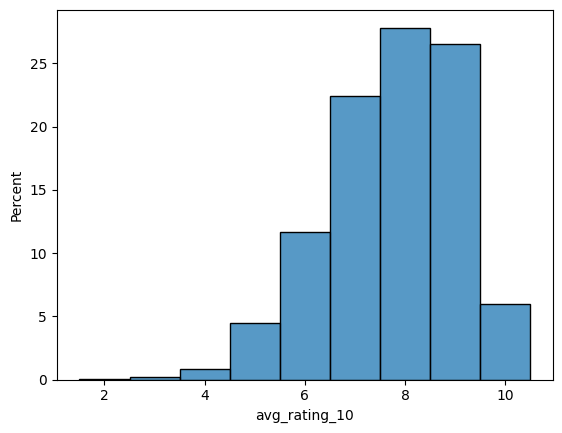

In [318]:
# sns.histplot(data=spain_df_0, x="avg_rating_10", stat="percent", discrete=True) # kde=True, 
# plt.show()

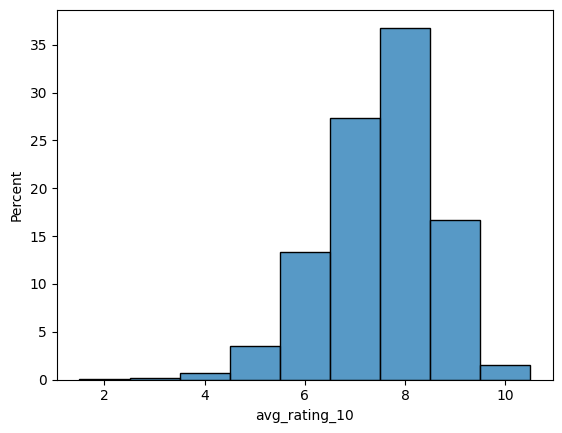

In [317]:
# sns.histplot(data=spain_df_1, x="avg_rating_10", stat="percent", discrete=True)
# plt.show()

<a id="theory"></a>

## 2.2. Theory of two-sample problems

**scipy.stats.ttest_ind**

This is a test for the null hypothesis that 2 independent samples have identical average (expected) values.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test

In [464]:
def ttest_by_feature(df, target, feature, sample_size):
    '''
    The function is for calculating the t-statistic and the p-value for the means of 2 independent samples.
    
    Arguments:
    df - dataframe with at least target and feature columns;
    target - numerical (float) column (score);
    feature - numerical (int, values: 0, 1) column;
    sample_size - integer value for limitation of 0-sample and 1-sample.
    '''

    df_01 = df[[target,feature]]
    array_0 = np.array(df_01[target][df_01[feature] == 0].sample(n=sample_size, random_state=1))
    array_1 = np.array(df_01[target][df_01[feature] == 1].sample(n=sample_size, random_state=1))

    print("Statistics of {0}".format(target))
    print("- for sample without {0}: mean = {1:.3f}, standard deviation = {2:.3f}, variance = {3:.3f}".format(feature, array_0.mean(), array_0.std(), array_0.var()))
    print("- for sample with    {0}: mean = {1:.3f}, standard deviation = {2:.3f}, variance = {3:.3f}".format(feature, array_1.mean(), array_1.std(), array_1.var()))

    if np.abs(array_0.var() - array_1.var()) < 0.1 * array_0.var():
        print("The variances are equals")
        t_stat, p_value = stats.ttest_ind(array_0, array_1, equal_var=True)
        # If True (default), perform a standard independent 2 sample test that assumes equal population variances
    else: 
        print("The variances aren't equals")
        t_stat, p_value = stats.ttest_ind(array_0, array_1, equal_var=False) 
        # If False, perform Welch’s t-test, which does not assume equal population variance
    print()
    print("t-stat = {0:.3f}, p-value = {1:.20f}".format(t_stat, p_value))
    if p_value <= 0.05:
        print("We should reject H_0 hypothesis")
    else:
        print("We failed to reject H_0 hypothesis")

    sns.set(color_codes=True)
    plt.figure(figsize=(12, 8))
#     sns.distplot(array_0, bins=20) #blue line
#     sns.distplot(array_1, bins=20); #orange line
    array_0_2 = array_0 * 2
    array_1_2 = array_1 * 2
    sns.histplot(array_0_2, stat="percent", discrete=True) # blue
    sns.histplot(array_1_2, stat="percent", discrete=True) # orange
    plt.show()

    return t_stat, p_value


<a id="spain"></a>

## 2.3. Case №1: Spain and Spanish cuisine [reject H0]

Hypotheses:

* H_0: The mean 'avg_rating' is **the same** for restaurants with and without Spanish cuisine. 

    * mu_without - mu_with == 0

* H_A: The mean 'avg_rating' for restaurants without Spanish cuisine is **greater** than the mean 'avg_rating' for restaurants with Spanish cuisine.

    * mu_without - mu_with > 0


We can only **reject H_0** or **fail to reject H_0**.


In [ ]:
base_rest_df2 = base_rest_df2[base_rest_df2['avg_rating'].notna()]

In [ ]:
spain_df = base_rest_df2[base_rest_df2['country'] == 'Spain']
# spain_df = spain_df[spain_df['avg_rating'].notna()]

In [389]:
spain_df.groupby('cuisines_Spanish').size()

cuisines_Spanish
0     7735
1    22687
dtype: int64

Statistics of avg_rating
- for sample without cuisines_Spanish: mean = 3.865, standard deviation = 0.657, variance = 0.432
- for sample with    cuisines_Spanish: mean = 3.824, standard deviation = 0.559, variance = 0.313

t-stat = 2.602, p-value = 0.00928168917865982920
We should reject H_0 hypothesis


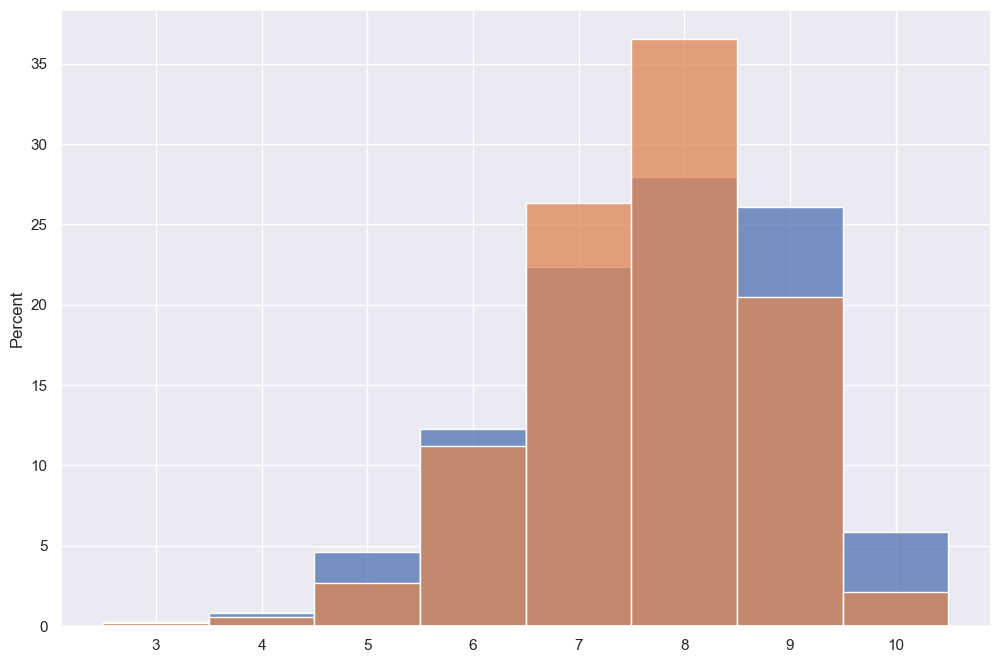

In [449]:
t_stat, p_value = ttest_by_feature(
    spain_df[spain_df['total_reviews_count'] >= 10], 
    'avg_rating', 
    'cuisines_Spanish', 
    3000
)


In [473]:
# with duplication based on nuber of reviews

def duplicated_df(df, counter, other_columns):
    df_3 = df[[counter] + other_columns]
    df_long = pd.DataFrame([df_3.loc[idx] 
                            for idx in df_3.index 
                            for _ in range(int(df_3.loc[idx][counter]))
                            ]).reset_index(drop=True)
    
    return df_long

In [474]:
spain_df_long = duplicated_df(spain_df, 'total_reviews_count', ['avg_rating', 'cuisines_Spanish'])
spain_df_long.shape

In [394]:
spain_df_long.groupby('cuisines_Spanish').size()

cuisines_Spanish
0.0     965199
1.0    2901775
dtype: int64

Statistics of avg_rating
- for sample without cuisines_Spanish: mean = 4.154, standard deviation = 0.551, variance = 0.304
- for sample with    cuisines_Spanish: mean = 3.971, standard deviation = 0.547, variance = 0.300

t-stat = 10.520, p-value = 0.00000000000000000000
We should reject H_0 hypothesis


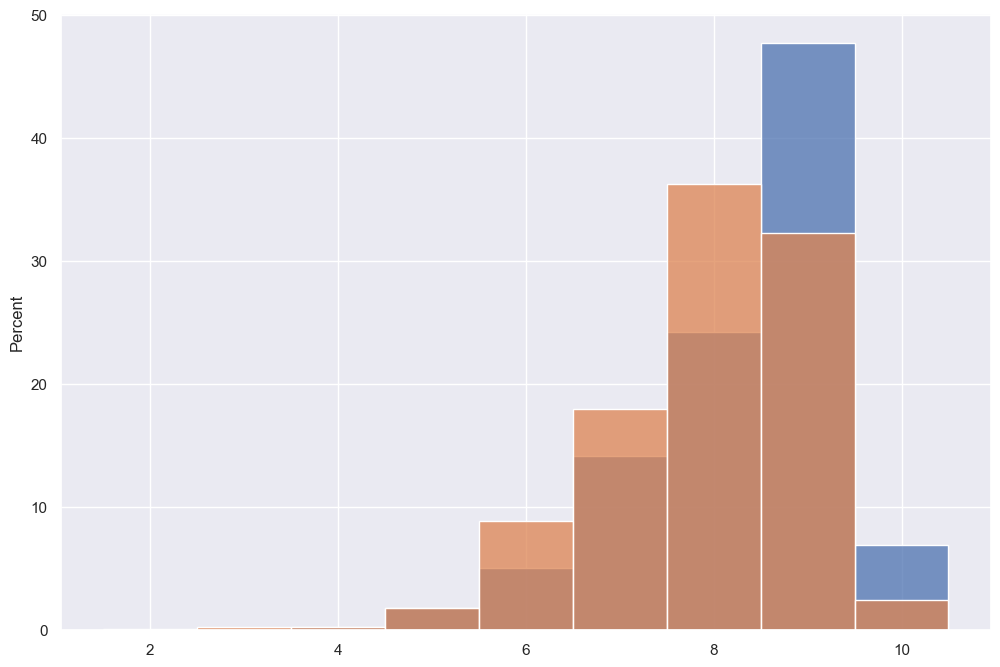

In [451]:
t_stat, p_value = ttest_by_feature(spain_df_long, 'avg_rating', 'cuisines_Spanish', 2000)


<a id="uk1"></a>

## 2.4. Case №2: UK and Cheap Eats [reject H0]

In [455]:
uk_df = base_rest_df2[base_rest_df2['country'] == 'United Kingdom']
# uk_df = uk_df[uk_df['avg_rating'].notna()]

In [486]:
uk_df_long = duplicated_df(uk_df, 'total_reviews_count', ['avg_rating', 'price_level_Cheap Eats'])
uk_df_long.shape

(7925409, 3)

In [487]:
uk_df_long.groupby('price_level_Cheap Eats').size()

price_level_Cheap Eats
0.0    7073580
1.0     851829
dtype: int64

Statistics of avg_rating
- for sample without price_level_Cheap Eats: mean = 4.187, standard deviation = 0.412, variance = 0.169
- for sample with    price_level_Cheap Eats: mean = 3.908, standard deviation = 0.667, variance = 0.445
The variances aren't equals

t-stat = 19.503, p-value = 0.00000000000000000000
We should reject H_0 hypothesis


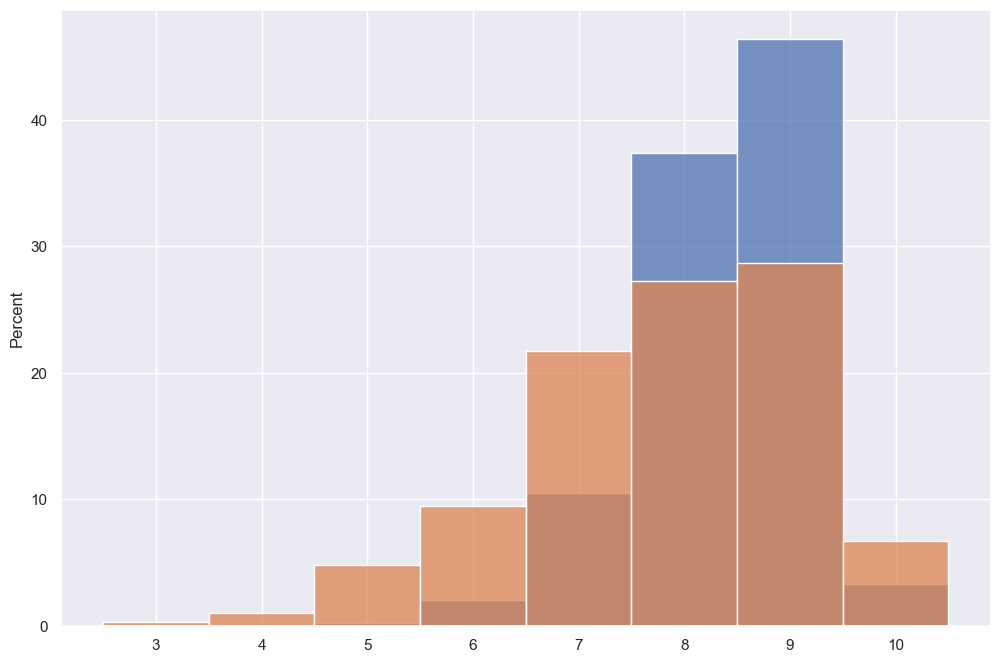

In [490]:
t_stat, p_value = ttest_by_feature(
    uk_df_long, 
    'avg_rating', 
    'price_level_Cheap Eats', 
    3000
)


<a id="uk2"></a>

## 2.5. Case №3: UK and Vegetarian Friendly [reject H0]

In [492]:
uk_df_long2 = duplicated_df(uk_df, 'total_reviews_count', ['avg_rating', 'special_diets_Vegetarian Friendly'])
uk_df_long2.shape

(7925409, 3)

In [493]:
uk_df_long2.groupby('special_diets_Vegetarian Friendly').size()

special_diets_Vegetarian Friendly
0.0    1338407
1.0    6587002
dtype: int64

Statistics of avg_rating
- for sample without special_diets_Vegetarian Friendly: mean = 3.821, standard deviation = 0.629, variance = 0.395
- for sample with    special_diets_Vegetarian Friendly: mean = 4.242, standard deviation = 0.373, variance = 0.139
The variances aren't equals

t-stat = -31.561, p-value = 0.00000000000000000000
We should reject H_0 hypothesis


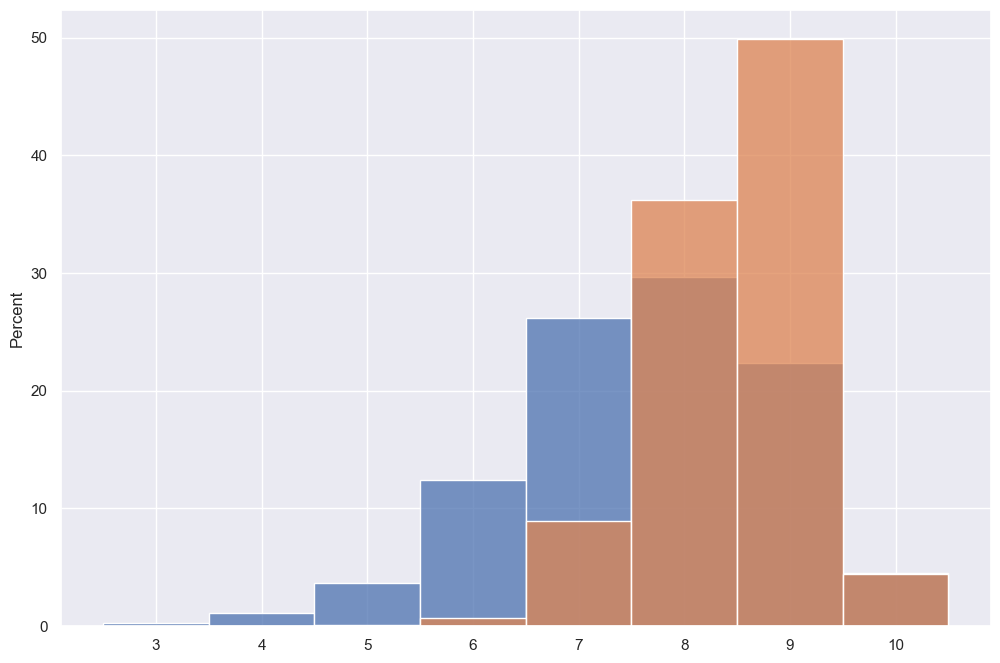

In [494]:
t_stat, p_value = ttest_by_feature(
    uk_df_long2, 
    'avg_rating', 
    'special_diets_Vegetarian Friendly', 
    3000
)


<a id="italy1"></a>

## 2.6. Case №4: Italy and Cheap Eats [failed to reject]

In [458]:
italy_df = base_rest_df2[base_rest_df2['country'] == 'Italy']
italy_df = italy_df[italy_df['avg_rating'].notna()]

In [476]:
italy_df_long = duplicated_df(italy_df, 'total_reviews_count', ['avg_rating', 'price_level_Cheap Eats'])
italy_df_long.shape

(5006684, 3)

In [477]:
italy_df_long.groupby('price_level_Cheap Eats').size()

price_level_Cheap Eats
0.0    3779385
1.0    1227299
dtype: int64

Statistics of avg_rating
- for sample without price_level_Cheap Eats: mean = 3.936, standard deviation = 0.531, variance = 0.282
- for sample with    price_level_Cheap Eats: mean = 3.926, standard deviation = 0.547, variance = 0.299
The variances are equals

t-stat = 0.694, p-value = 0.48742762114254822858
We failed to reject H_0 hypothesis


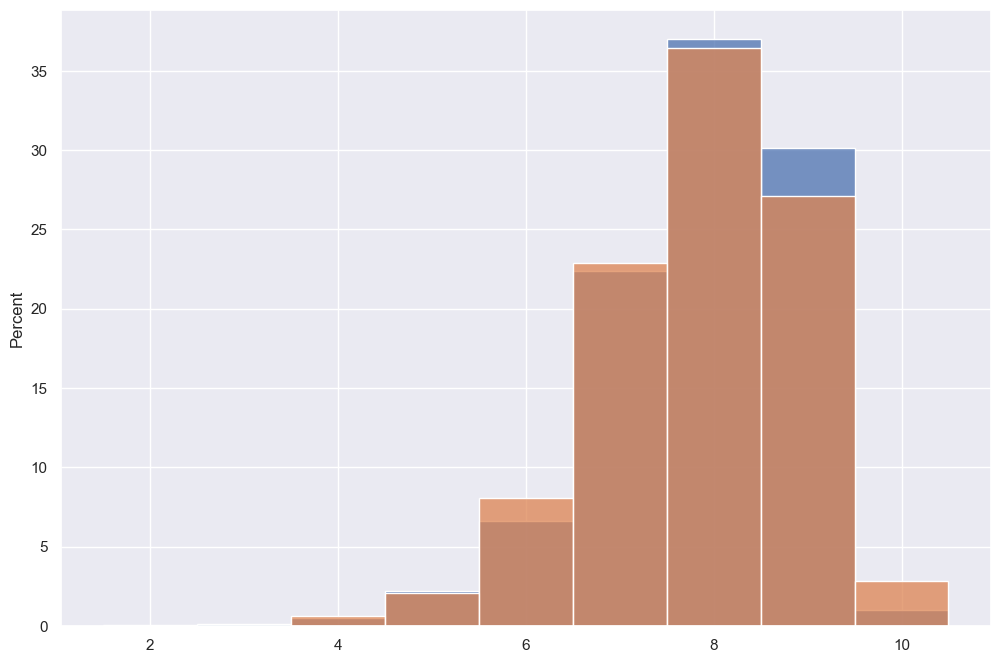

In [479]:
t_stat, p_value = ttest_by_feature(
    italy_df_long, 
    'avg_rating', 
    'price_level_Cheap Eats', 
    3000
)


# =================== UNACTUAL

### One-sample problems

Hypotheses:

- H_0: The mean 'avg_rating' is **the same** for restaurants with and without Spanish cuisine. 

- H_A: The mean 'avg_rating' for restaurants without Spanish cuisine is **greater** than the mean 'avg_rating' for restaurants with Spanish cuisine.

We can only **reject H_0** or **fail to reject H_0**.


Types:

- "two-tailed": H_A =/= H_0
- "right-tailed": H_A > H_0 ====> 1 - norm.cdf()
- "left-tailed": H_A < H_0 ====> norm.cdf()



For our "Spain" problem:

Previous research: the mean 'avg_rating' for restaurants **with Spanish cuisine** is **3.96** (of 5).

- H_0: The mean 'avg_rating' is **the same** for restaurants with and without Spanish cuisine. 

- H_A: The mean 'avg_rating' is **not the same** for restaurants with and without Spanish cuisine.

<!-- - H_A: The mean 'avg_rating' for restaurants without Spanish cuisine is **greater** than the mean 'avg_rating' for restaurants with Spanish cuisine. -->
<!-- "Spain" hypothesis is right-tailed. -->

So, "Spain" hypothesis is **two-tailed**.

In [386]:
alpha = 0.05

prop_0_samp = (spain_df_long['avg_rating'][spain_df_long['cuisines_Spanish'] == 0]).mean() # 4.12
prop_0_hyp = (spain_df_long['avg_rating'][spain_df_long['cuisines_Spanish'] == 1]).mean() # 3.96
std_error = np.std(spain_df_long['avg_rating'], ddof=1) # 0.56
z_score = (prop_0_samp - prop_0_hyp) / std_error # 0.29
# p_value = 1 - norm.cdf(z_score, loc=0, scale=1) # IS THIS CORRECT? it's for right-tailed, but we have two-tailed
p_value = norm.cdf(-z_score) + 1 - norm.cdf(z_score)

print(p_value)
print(p_value <= alpha)

0.7713932570324856
False


Failed to reject H_0 in favor of H_A

In [ ]:
import scipy.stats as stats
import math

# Specify the sample mean (x_bar), the sample standard deviation (s), the mean claimed in the null-hypothesis (mu_null), and the sample size (n)
x_bar = 3.96
s = np.std(spain_df_long['avg_rating'], ddof=1)
mu_null = 3.96
n = 30

# Calculate the test statistic
test_stat = (x_bar - mu_null)/(s/math.sqrt(n))

# Output the p-value of the test statistic (two tailed test)
print(2*(1-stats.t.cdf(test_stat, n-1)))


In [377]:
from scipy.stats import norm

x_without.mean() - x_with.mean() - *test-statistic*

So, "Spain" hypothesis is **right-tailed** (?)

<a id="conclusions"></a>

# 3. Conclusions

# =========================== OLD:

In [ ]:
'''
IDEALLY: if I compare by 1 feature, other features must be the same

BUT: restaurants with 'special_diets' are BETTER almost always
'''